In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import pandas as pd


data = pd.read_csv("updated_pollution_dataset.csv.xls")
print(data.head())
X = data.drop(columns=["Air Quality"])
y = data["Air Quality"]
y_num = LabelEncoder().fit_transform(y)
print(y_num[:10])
X_train, X_test, y_train, y_test = train_test_split(X, y_num, test_size=0.2, random_state=1)

   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  \
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72   
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64   
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63   
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15   
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01   

   Proximity_to_Industrial_Areas  Population_Density Air Quality  
0                            6.3                 319    Moderate  
1                            6.0                 611    Moderate  
2                            5.2                 619    Moderate  
3                           11.1                 551        Good  
4                           12.7                 303        Good  
[2 2 2 0 0 1 3 2 3 3]


Accuracy of Decision Tree Classifier:  0.92
Precision of Decision Tree Classifier:  0.9200390008001949
Recall of Decision Tree Classifier:  0.92
F1-Score of Decision Tree Classifier:  0.9200079943684895
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       404
           1       0.82      0.81      0.81       100
           2       0.92      0.93      0.93       296
           3       0.81      0.81      0.81       200

    accuracy                           0.92      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.92      0.92      0.92      1000

{'max_depth': 11}


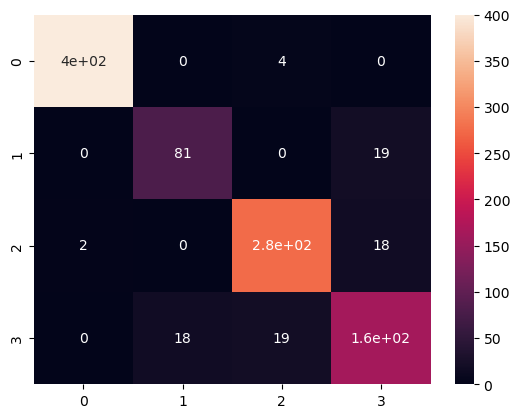

In [9]:
# DECISION TREE CLASSIFIER
dt = DecisionTreeClassifier(random_state=1, max_depth = 15)
# train the model
dt.fit(X_train, y_train)
# make predictions
dt_pred = dt.predict(X_test)
# print the accuracy
print("Accuracy of Decision Tree Classifier: ", accuracy_score(y_test, dt_pred))
# print other performance metrics
print("Precision of Decision Tree Classifier: ", precision_score(y_test, dt_pred, average='weighted'))
print("Recall of Decision Tree Classifier: ",  recall_score(y_test, dt_pred, average='weighted'))
print("F1-Score of Decision Tree Classifier: ", f1_score(y_test, dt_pred, average='weighted'))
print(classification_report(y_test, dt_pred))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True)



Tree_params = {'max_depth': [1,3,5,7,9,11]}  # dictionary with hyperparameters as keys and possible values to check as values

Masterclf = GridSearchCV(dt, Tree_params, scoring='accuracy')

Masterclf.fit(X_train, y_train)
print(Masterclf.best_params_)

Accuracy of Random Forest Classifier:  0.953
Precision of Random Forest Classifier:  0.9527605624592391
Recall of Random Forest Classifier:  0.953
F1-Score of Random Forest Classifier:  0.9526858956551357
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       404
           1       0.93      0.88      0.90       100
           2       0.93      0.97      0.95       296
           3       0.90      0.88      0.89       200

    accuracy                           0.95      1000
   macro avg       0.94      0.93      0.94      1000
weighted avg       0.95      0.95      0.95      1000

{'n_estimators': 9}


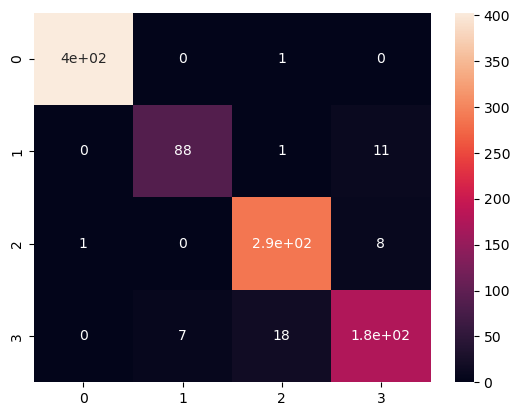

In [15]:
# RANDOM FOREST CLASSIFIER
rf = RandomForestClassifier(random_state=1, n_estimators = 60)
# train the model
rf.fit(X_train, y_train)
# make predictions
rf_pred = rf.predict(X_test)
# print the accuracy
print("Accuracy of Random Forest Classifier: ",
      accuracy_score(y_test, rf_pred))
# # print other performance metrics
print("Precision of Random Forest Classifier: ",      precision_score(y_test, rf_pred, average='weighted'))
print("Recall of Random Forest Classifier: ",      recall_score(y_test, rf_pred, average='weighted'))
print("F1-Score of Random Forest Classifier: ",      f1_score(y_test, rf_pred, average='weighted'))
print(classification_report(y_test, rf_pred))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True)



forest_params = {'n_estimators':[1,3,5,7,9]}

clf = GridSearchCV(rf, forest_params, scoring='accuracy')

clf.fit(X_train, y_train)
print(clf.best_params_)

Accuracy of Logistic Regression:  0.941
Precision of Logistic Regression:  0.9402044711841939
Recall of Logistic Regression:  0.941
F1-Score of Logistic Regression:  0.9405088422557154

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       404
           1       0.87      0.84      0.85       100
           2       0.94      0.96      0.95       296
           3       0.87      0.84      0.86       200

    accuracy                           0.94      1000
   macro avg       0.92      0.91      0.91      1000
weighted avg       0.94      0.94      0.94      1000



<Axes: >

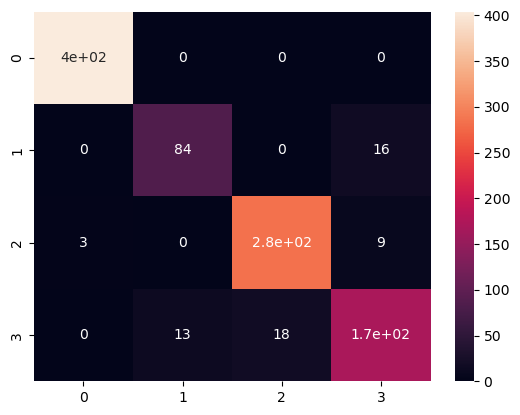

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression with higher max_iter and a solver
lr = LogisticRegression(random_state=1, max_iter=1000)

# Train the model
lr.fit(X_train_scaled, y_train)

# Make predictions
lr_pred = lr.predict(X_test_scaled)

# Evaluate the performance
print("Accuracy of Logistic Regression: ", accuracy_score(y_test, lr_pred))
print("Precision of Logistic Regression: ", precision_score(y_test, lr_pred, average='weighted'))
print("Recall of Logistic Regression: ", recall_score(y_test, lr_pred, average='weighted'))
print("F1-Score of Logistic Regression: ", f1_score(y_test, lr_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, lr_pred))

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, lr_pred)
sns.heatmap(conf_matrix, annot=True)